In [81]:
from concepts import Context
import pandas as pd

from itertools import combinations

# Creación de csv para el reticulo
Carga de datos en csv, adaptacion de los datos al formato de la libreria de reticulos, creacion de csv

In [82]:
# cargar el dataframe
df_movies = pd.read_csv('data/movies_data_format_genres.csv')

df_movies.head()

,id,companies,director,genres,keywords,stars,title,writers,year,Thriller,...,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
0,1,Pixar Animation Studios|Walt Disney Pictures,John Lasseter,Family|Fantasy|Comedy|Adventure|Animation,claw crane|toy|cgi animation|cowboy|rivalry,Don Rickles|Tim Allen|Tom Hanks,Toy Story,Pete Docter|John Lasseter,1995,0,...,0,0,1,0,0,1,0,0,0,1
1,32,Atlas Entertainment|Universal Pictures|Classico,Terry Gilliam,Mystery|Thriller|Sci-Fi,mental institution|time travel|underground|psy...,Brad Pitt|Madeleine Stowe|Bruce Willis,Doce monos,Chris Marker|David Webb Peoples,1995,1,...,0,0,0,0,0,0,0,1,0,0
2,47,New Line Cinema|Juno Pix|Cecchi Gori Pictures,David Fincher,Mystery|Thriller|Drama|Crime,human monster|serial murder|seven deadly sins|...,Morgan Freeman|Brad Pitt|Kevin Spacey,Seven,Andrew Kevin Walker,1995,1,...,1,0,0,0,0,0,1,1,0,0
3,50,Spelling Films International|PolyGram Filmed E...,Bryan Singer,Mystery|Thriller|Crime,burying a body|suspect|criminal mastermind|dir...,Gabriel Byrne|Chazz Palminteri|Kevin Spacey,Sospechosos habituales,Christopher McQuarrie,1995,1,...,0,0,0,0,0,0,1,1,0,0
4,110,The Ladd Company|B.H. Finance C.V.|Icon Entert...,Mel Gibson,War|Biography|Drama|History,legend|14th century|revolt|scotland|england,Patrick McGoohan|Sophie Marceau|Mel Gibson,Braveheart,Randall Wallace,1995,0,...,1,0,0,0,1,0,0,0,1,0


In [83]:
df_movies[df_movies['id'] == 380]

,id,companies,director,genres,keywords,stars,title,writers,year,Thriller,...,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
15,380,Lightstorm Entertainment|Twentieth Century Fox,James Cameron,Action|Thriller|Comedy,remake|secret mission|spy|tango|secret agent,Tom Arnold|Jamie Lee Curtis|Arnold Schwarzenegger,Mentiras arriesgadas,Simon Michaël|Claude Zidi,1994,1,...,0,1,0,0,0,0,0,0,0,0


In [84]:
# adaptar el dataframe
# delete the non necessary columns

# guardo los ids, porque necesito la correspondencia entre ids y rows
df_ids = df_movies['id']

df_movies = df_movies.drop(['companies', 'director', 'genres', 'keywords', 'stars', 'title', 'writers', 'year', 'id'], axis=1)

df_movies.head()

,Thriller,Biography,Romance,Adventure,Sci-Fi,Comedy,Musical,Horror,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [85]:
# reemplazar los 1, por las X
df_movies = df_movies.replace([0, 1], ['', 'X'])

column_names = ['id'] + df_movies.columns.tolist() 
#print(column_names)

df_movies['id'] = df_ids

df_movies.head()

df_movies = df_movies[column_names]

df_movies.head()

,id,Thriller,Biography,Romance,Adventure,Sci-Fi,Comedy,Musical,Horror,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
0,1,,,,X,,X,,,,,X,,,X,,,,X
1,32,X,,,,X,,,,,,,,,,,X,,
2,47,X,,,,,,,,X,,,,,,X,X,,
3,50,X,,,,,,,,,,,,,,X,X,,
4,110,,X,,,,,,,X,,,,X,,,,X,


In [86]:
# Filtro las peliculas que nos interesan

recommended_item = ['380'] #['344']
similar_items = ['150', '4306', '47', '4226', '32']

movies_list = recommended_item + similar_items

df_movies = df_movies.loc[df_movies['id'].isin(movies_list)]

df_movies

,id,Thriller,Biography,Romance,Adventure,Sci-Fi,Comedy,Musical,Horror,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
1,32,X,,,,X,,,,,,,,,,,X,,
2,47,X,,,,,,,,X,,,,,,X,X,,
5,150,,,,X,,,,,X,,,,X,,,,,
15,380,X,,,,,X,,,,X,,,,,,,,
43,4226,X,,,,,,,,,,,,,,,X,,
44,4306,,,,X,,X,,,,,X,,,X,,,,X


In [87]:
df_movies[df_movies['id'] == 110]

,id,Thriller,Biography,Romance,Adventure,Sci-Fi,Comedy,Musical,Horror,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation


In [88]:
# pasarlo a un csv
df_movies.to_csv("data/fca.csv",index=False)

# en fca.csv tengo la estructura para crear el retculo, segun el formato de la libreria concepts

# Creación del retículo y visualización

In [89]:
# crear el reticulo
r = Context.fromfile('data/fca.csv', frmat='csv')

#print(r)

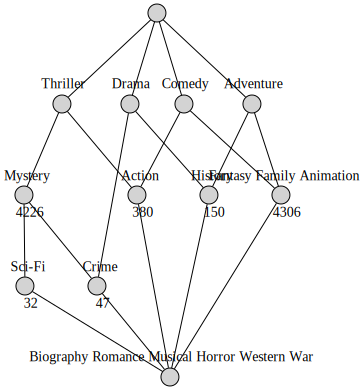

In [90]:
# visualizarlo
lat = r.lattice
lat.graphviz(view=True)

# Encontrar generos comunes en las películas similares
En función de un id de un conjunto de películas similares, encontrar qué características, en este caso, géneros, tienen en común. 

In [100]:
def find_max_list(recommended_item, similar_items, result, features_size, final_result, final_size):
    """
        Funcion que va a calcular la lista de caracteristicas en comun mas grande que hay entre simir_items y 
        recommended_item.
        Result va a ser una lista de tuplas: (item_ids, features)
        - items_ids: es la lista de ids de las peliculas similares
        - features: la lista de caracteristicas en comun entre items_ids y recommended_item
    """
    similar_items = list(similar_items)
    
    # caso base:
    # si ya hemos recorrido toda la lista, devolvemos el resultado
    if similar_items == []:
        if (len(result[0][1]) != 0):
            final_result.append(result)
    else:
        movies_list = recommended_item + similar_items

        # devuelve los generos en comun
        common_features = r.intension(movies_list)
        
        current_size = len(common_features)
        
        if (current_size > features_size):
            # borro lo que habia antes y guardo lo nuevo
            result = [(similar_items, common_features)]
            features_size = current_size
        elif (current_size == features_size):
            # incluyo una nueva solucion
            result.append((similar_items, common_features))
        
        features_combination = list(combinations(similar_items, len(similar_items)-1))
        
        for comb in features_combination:
            find_max_list(recommended_item, comb, result, features_size, final_result, final_size)           

In [101]:
recommended_item = ['380'] 
similar_items = ['150', '4306', '47', '4226', '32']

resultado = list()
final_result = list()
find_max_list(recommended_item, similar_items, resultado, 0, final_result, 0)

print(final_result)

[[(['4306'], ('Comedy',))], [(['47'], ('Thriller',))], [(['4306'], ('Comedy',))], [(['47'], ('Thriller',))], [(['4306'], ('Comedy',))], [(['4226'], ('Thriller',))], [(['4306'], ('Comedy',))], [(['4226'], ('Thriller',))], [(['47'], ('Thriller',))], [(['4226'], ('Thriller',))], [(['47', '4226'], ('Thriller',)), (['47'], ('Thriller',)), (['4226'], ('Thriller',))], [(['47', '4226'], ('Thriller',)), (['47'], ('Thriller',)), (['4226'], ('Thriller',))], [(['4306'], ('Comedy',))], [(['47'], ('Thriller',))], [(['4306'], ('Comedy',))], [(['4226'], ('Thriller',))], [(['47', '4226'], ('Thriller',)), (['47'], ('Thriller',)), (['4226'], ('Thriller',))], [(['47', '4226'], ('Thriller',)), (['47'], ('Thriller',)), (['4226'], ('Thriller',))], [(['4306'], ('Comedy',))], [(['47'], ('Thriller',))], [(['4306'], ('Comedy',))], [(['47'], ('Thriller',))], [(['4306'], ('Comedy',))], [(['32'], ('Thriller',))], [(['4306'], ('Comedy',))], [(['32'], ('Thriller',))], [(['47'], ('Thriller',))], [(['32'], ('Thriller',

# Encontrar películas similares con géneros en común

In [93]:
def similar_items(item_id, features):
    """
        Function to find the similar items to id, It finds the items with the highest number of features in common
    """

    size_m_genres = len(features)

    # Obtenemos todas las posibilidades de generos que pueden tener las peliculas similares
    posibles_genres = list()
    for i in range(1,size_m_genres+1):
        posibles_genres = posibles_genres + [list(elem) for elem in list(combinations(features, i))]  
        
    
    # Obtenemos una lista de tuplas. Cada tupla t contiene lo siguiente:
    # (id_movies, genres_movies)
    # id_movies: conjunto de ids de peliculas similares, que tienen un genero en comun
    # genres_movies: la lista de generos que tienen id_movies en comun con la pelicula recomendada movie_id

    similar_movies = list()
    for genres_list in posibles_genres:
        moviesWithGenres = lat[genres_list]

        it = iter(moviesWithGenres)
        for movie in it:
            list_movies = list(movie)
            list_movies.remove(item_id)
            similar_movies = similar_movies + [(list_movies, list(next(it)))]

    #print(similar_movies)
    
    
    # recoger la/s tuplas con mayor numero de generos en comun: la tupla con la lista de generos mayor, 
    # cuya lista de id_movies no este vacia


    # obtenemos la longitud de la lista con mayor numero de generos
    max_size = max([len(genres_movies) for (id_movies, genres_movies) in similar_movies if len(id_movies) != 0])

    # obtenemos las peliculas que tienen mayor numero de generos
    # (movie_id, genres_list)
    similar_movies = [(id_movies, genres_movies) for (id_movies, genres_movies) in similar_movies if len(genres_movies) == max_size]

    #print(similar_movies)
    
    return similar_movies

In [94]:
## MODO 1: si filtramos el dataset para que solo aparezcan las peliculas similares, sacamos la pelicula 
# con mayor numero de generos 

# voy a obtener la lista de peliculas con mayor numero de generos
# esto lo hacemos con el objetivo de encontrar la pelicula mas parecida (con mayor numero de generos en comun con la 
# pelicula recomendada)

# obtenemos la longitud de la lista con mayor numero de generos
max_size = max([len(intent) for extent, intent in lat if len(extent) != 0])

# obtenemos las peliculas que tienen mayor numero de generos
# (movie_id, genres_list)
similar_movies = [(extent, intent) for extent, intent in lat if len(intent) == max_size]

print(similar_movies)

[(('4306',), ('Adventure', 'Comedy', 'Fantasy', 'Family', 'Animation'))]


In [95]:
## MODO 2: dada una pelicula (id, genres), sacamos las peliculas que tienen mas generos en comun con id

movie_id = '32'
movie_genres = ['Mystery','Sci-Fi','Thriller']


sim_items = similar_items(movie_id, movie_genres)
    
print(sim_items)

[(['47', '4226'], ['Thriller', 'Mystery']), (['47', '4226'], ['Thriller', 'Mystery'])]
